# For basic math operations

In [12]:
%matplotlib inline
import numpy as np

# For plotting

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# For astronomy stuff

In [14]:
import astropy.io.fits as pyfits
from astropy.table import Table

# Read table from fits file

In [15]:
# Filename
filename = "./UNCOVER_DR1_LW_D070_catalog.fits"

# Open fits table to see its content
hdu = pyfits.open(filename)
print(hdu.info())

# Read data
data = Table.read(filename, hdu=1)

Filename: ./UNCOVER_DR1_LW_D070_catalog.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    281   50365R x 96C   [K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, K, K, K, K, K, K, D, K, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, D, D, D, D, D]   
None


# Plot color-magnitude diagram

## Formula for apparent magnitude
If the flux is in units of $\rm erg~s^{−1}~cm^{−2}~Hz^{−1}$:
$m_{\rm AB} = -2.5 \log_{10} \left( f_\nu \right) - 48.60$

If the flux is in units of nano-jansky:
$m_{\rm AB} = -2.5 \log_{10} \left( f_\nu \right) + 8.90$

/var/folders/3g/01j4v12d63gbh8_wsh3wmxrr0000gn/T/ipykernel_96441/337852590.py:2: RuntimeWarning: invalid value encountered in log10
  abmag = -2.5 * np.log10(flux_njy * 1e-9) + 8.90


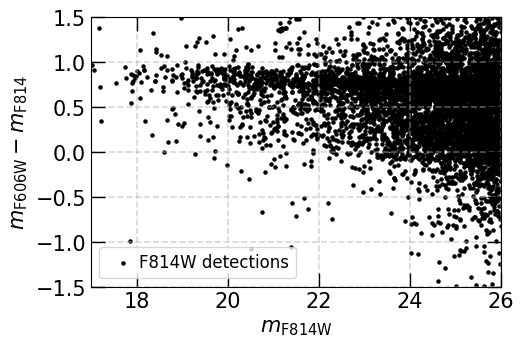

In [16]:
def njy_to_abmag(flux_njy):
   abmag = -2.5 * np.log10(flux_njy * 1e-9) + 8.90
   return abmag
   
# Convert fluxes to magnitudes
data["f_f606w"] = njy_to_abmag(10*data["f_f606w"])
data["f_f814w"] = njy_to_abmag(10*data["f_f814w"])

# Initialize the figure
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))
fig.subplots_adjust(left=.15, bottom=.20, right=.97, top=.97, wspace=0.25, hspace=0.0)

ax.scatter(data["f_f814w"], data["f_f606w"] - data["f_f814w"], s=5, c="k", label="F814W detections")

# Set range of the plot
ax.set_xlim(17, 26)
ax.set_ylim(-1.5, 1.5)

# Set axis labels
ax.set_xlabel(r"$m_{\rm F814W}$", fontsize=15)
ax.set_ylabel(r"$m_{\rm F606W} - m_{\rm F814}$", fontsize=15)

# Set axis ticks
ax.tick_params(axis='both',length=10,width=1,which='major',direction="in", right=True,top=True,labelsize=15)
ax.tick_params(axis='both',length=6, width=1,which='minor',direction="in", right=True,top=True,labelsize=15)

# Set grid and legend
ax.grid(ls="--", lw=1.2, alpha=0.5)
ax.legend(fontsize=12, handletextpad=0, loc="lower left")

plt.show()

# What do you see? Randomly distributed points? Or some trend(s)?

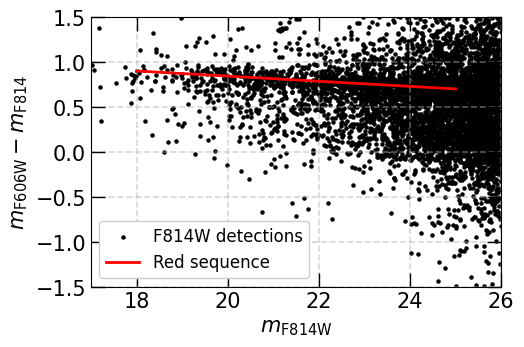

In [17]:
# Initialize the figure
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))
fig.subplots_adjust(left=.15, bottom=.20, right=.97, top=.97, wspace=0.25, hspace=0.0)

ax.scatter(data["f_f814w"], data["f_f606w"] - data["f_f814w"], s=5, c="k", label="F814W detections")

ax.plot([18, 25], [0.9, 0.7], c="r", lw=2, label="Red sequence")

# Set range of the plot
ax.set_xlim(17, 26)
ax.set_ylim(-1.5, 1.5)

# Set axis labels
ax.set_xlabel(r"$m_{\rm F814W}$", fontsize=15)
ax.set_ylabel(r"$m_{\rm F606W} - m_{\rm F814}$", fontsize=15)

# Set axis ticks
ax.tick_params(axis='both',length=10,width=1,which='major',direction="in", right=True,top=True,labelsize=15)
ax.tick_params(axis='both',length=6, width=1,which='minor',direction="in", right=True,top=True,labelsize=15)

# Set grid and legend
ax.grid(ls="--", lw=1.2, alpha=0.5)
ax.legend(fontsize=12, loc="lower left", framealpha=1.0)

plt.show()

# Let us try to measure flux of one of the object
### <span style="color: red;">This serves merely as an illustration. There are many things that we are missing here. You will learn more about these if you come in astro.</span>

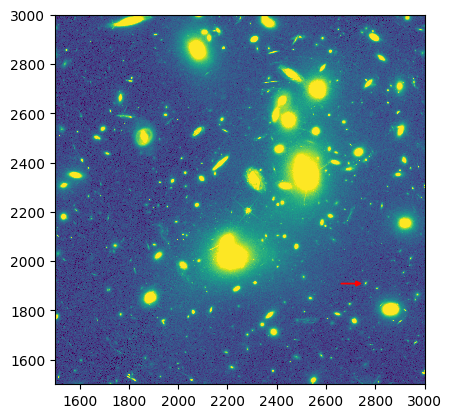

In [48]:
import astropy.wcs as wcs
from astropy.visualization import simple_norm
from photutils.aperture import CircularAnnulus, CircularAperture

hdu = pyfits.open("./HST/hlsp_frontier_hst_acs-60mas-selfcal_abell2744_f814w_v1.0-epoch2_drz.fits")
data = hdu[0].data
wcs = wcs.WCS(hdu[0].header)

ra, dec = 3.5815841, -30.4074278
x, y = wcs.all_world2pix(ra, dec, 0)

norm = simple_norm(data, 'sqrt', percent=99)
plt.imshow(data, origin="lower", norm=norm, interpolation='nearest')
plt.arrow(x - 100, y - 0, 60, 0, head_width=20, head_length=20, fc='red', ec='red')

plt.xlim(1500, 3000)
plt.ylim(1500, 3000)

plt.show()

Source positions in pixels: (2761.1264, 1908.8271)


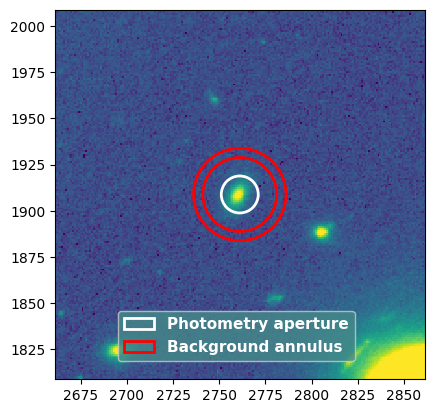

In [42]:
# Get units for photometry
photflam = hdu[0].header["PHOTFLAM"]

x, y = wcs.all_world2pix(ra, dec, 0)
print("Source positions in pixels: (%4.4f, %4.4f)"%(x, y))
# Load the JWST image data
# hdu = pyfits.open("./JWST/abell2744clu-grizli-v5.4-f115w-clear_drc_sci.fits")
# data = hdu[0].data


aperture = CircularAperture((x, y), r=10)
annulus = CircularAnnulus((x, y), r_in=20, r_out=25)

norm = simple_norm(data, 'sqrt', percent=99)
plt.imshow(data, origin="lower", norm=norm, interpolation='nearest')
plt.xlim(x - 100, x + 100)
plt.ylim(y - 100, y + 100)

ap_patches = aperture.plot(color='white', lw=2, label='Photometry aperture')
ann_patches = annulus.plot(color='red', lw=2, label='Background annulus')

handles = (ap_patches[0], ann_patches[0])
plt.legend(loc=(0.17, 0.05), facecolor='#458989', labelcolor='white', handles=handles, prop={'weight': 'bold', 'size': 11})
plt.show()

In [43]:
from photutils.aperture import aperture_photometry


aperture_flux = aperture_photometry(data, aperture)
annulus_stats = aperture_photometry(data, annulus)
print(aperture_flux)
print(annulus_stats)

# Flux in erg/s/cm^2/Å
flux_erg = aperture_flux['aperture_sum'] * photflam
print("\n\nFlux in erg/s/cm^2/Å: ", flux_erg.value[0])

 id      xcenter            ycenter          aperture_sum  
--- ------------------ ------------------ -----------------
  1 2761.1264183800986 1908.8270684341687 5.436072737836976
 id      xcenter            ycenter          aperture_sum   
--- ------------------ ------------------ ------------------
  1 2761.1264183800986 1908.8270684341687 0.9993910910592605


Flux in erg/s/cm^2/Å:  3.809222565588858e-19
